In [1]:
from IPython.display import Image

# Introduction to ML using Text Classication

Here’s a high-level overview of the workflow used to solve machine learning problems:

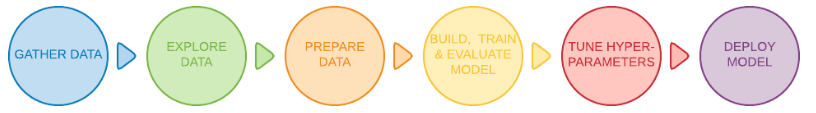

In [2]:
Image(filename='ML_steps.png')

# and Supervised Learning

    1.Learning from training data is called Supervided Learning. 
        a. Input: Training data
        b. Output: Prediction function that produces output Y given input X

In [3]:
import os
import _pickle as cPickle

import numpy as np
import matplotlib.pyplot as plt

from collections             import Counter

from sklearn.metrics         import accuracy_score
from sklearn.naive_bayes     import MultinomialNB
from sklearn.model_selection import train_test_split as tts
from sklearn.feature_extraction.text import CountVectorizer

# Problem

    1. Given an email identify if it is a Spam or a not-spam email

## Exaple

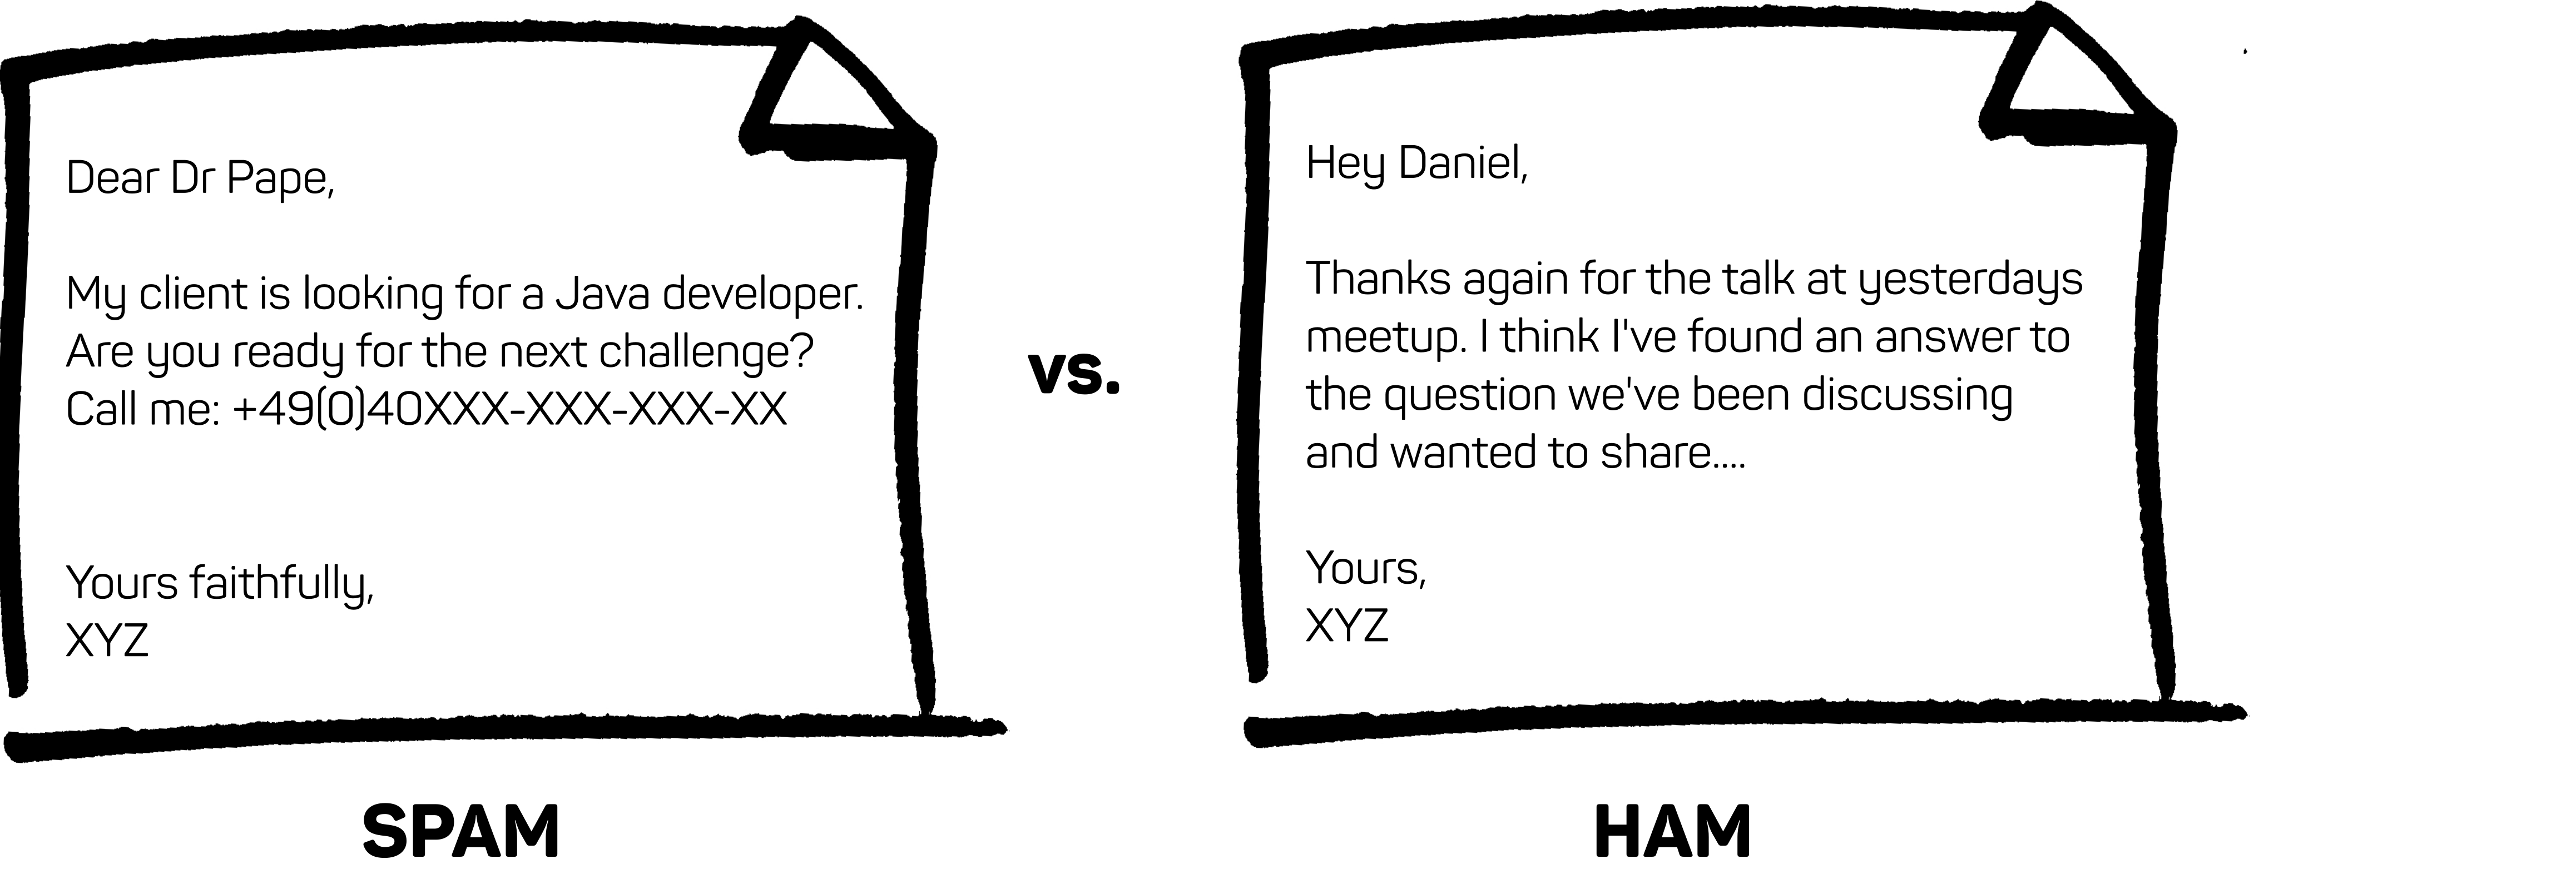

In [16]:
Image(filename='ham-vs-spam.png')

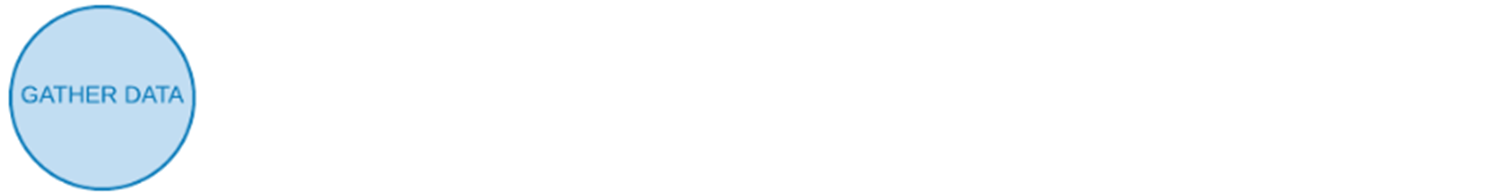

    1. Gathering data is a very important task in solving supervised machine learning problems because the ML classifier can only be as good as the dataset is built from. Because of that, the dataset selected for fix the spam or not-spam problem is a collection of emails classified as spam or ham from the Iran University of Science and Technology. 
    
    The dataset is available at: http://www2.aueb.gr/users/ion/data/enron-spam/

In [5]:
direc = "dataset/"
files = os.listdir(direc)
texts = [direc + file for file in files]

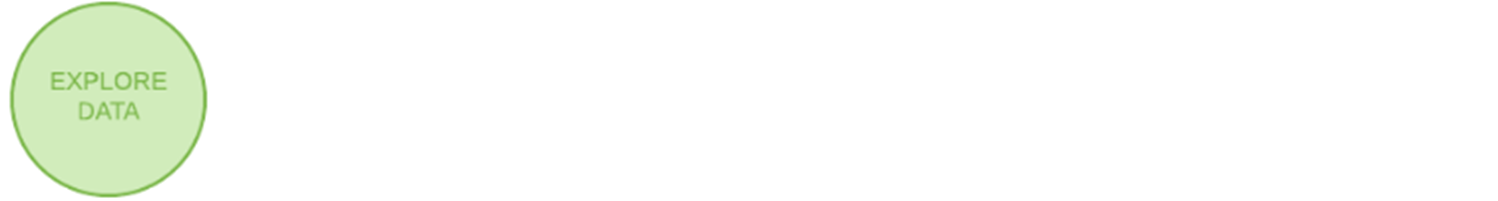
# Data example

In [6]:
texts[0:9]

['dataset/0000.1999-12-10.farmer.ham.txt',
 'dataset/0001.1999-12-10.farmer.ham.txt',
 'dataset/0002.1999-12-13.farmer.ham.txt',
 'dataset/0003.1999-12-14.farmer.ham.txt',
 'dataset/0004.1999-12-14.farmer.ham.txt',
 'dataset/0005.1999-12-14.farmer.ham.txt',
 'dataset/0006.2003-12-18.GP.spam.txt',
 'dataset/0007.1999-12-14.farmer.ham.txt',
 'dataset/0008.2003-12-18.GP.spam.txt']

# An example of a not-spam email

In [7]:
file = open(texts[0])
text = file.read().replace('\n',' ')

text

"Subject: ua 4 - meter 1441 for 11 / 97 - falfurrias daren - i need your help in resolving this issue . there wasn ' t any deal in oss for the above reference meter , nor could i find anything in cpr . the contract shows 089 - 41500 - 102 representing a sale in the amount of 9448 . thanks , stella"

# An example of a spam email

In [8]:
file = open(texts[6])
text = file.read().replace('\n',' ')

text

'Subject: dobmeos with hgh my energy level has gone up ! stukm introducing doctor - formulated hgh human growth hormone - also called hgh is referred to in medical science as the master hormone . it is very plentiful when we are young , but near the age of twenty - one our bodies begin to produce less of it . by the time we are forty nearly everyone is deficient in hgh , and at eighty our production has normally diminished at least 90 - 95 % . advantages of hgh : - increased muscle strength - loss in body fat - increased bone density - lower blood pressure - quickens wound healing - reduces cellulite - improved vision - wrinkle disappearance - increased skin thickness texture - increased energy levels - improved sleep and emotional stability - improved memory and mental alertness - increased sexual potency - resistance to common illness - strengthened heart muscle - controlled cholesterol - controlled mood swings - new hair growth and color restore read more at this website unsubscribe

# Key Metrics
Collecting metrics could be helpful for characterize text classification problem. Here are some key metrics that will be useful to get:

    1. Number of samples: total of examples in the dataset.
    2. Number of classes: total of topics or categories in the dataset.
    3. Frequency distribution of words: number of occurrences of each word.
    4. Distribution of sample length: number of words per sample.

In [9]:
print('1. Number of samples: {}'.format(len(texts)))
print('2. Number of classes: 2')

1. Number of samples: 5173
2. Number of classes: 2


In [10]:
def plot_sample_length_distribution(sample_texts):
    """Plots the sample length distribution.

    # Arguments
        samples_texts: list, sample texts.
    """
    
    plt.figure(figsize=(20,10))
    plt.hist([len(s) for s in sample_texts], 50)
    plt.xlabel('Length of a sample')
    plt.ylabel('Number of samples')
    plt.title('Sample length distribution')
    plt.show()
    
def load_text(dataset):

    def read_file(file):
        try:
            f = open(file)
            load = f.read()

            if load != None:
                return load
            else: return None
            
        except: return None
        # or print('encoding error type detected in the: {}'.format(file))
        
    loads = []
    for file in texts: 
        f = read_file(file)

        if f == None: pass
        else: loads.append(f)
            
    return loads

# 3. Frequency distribution of words

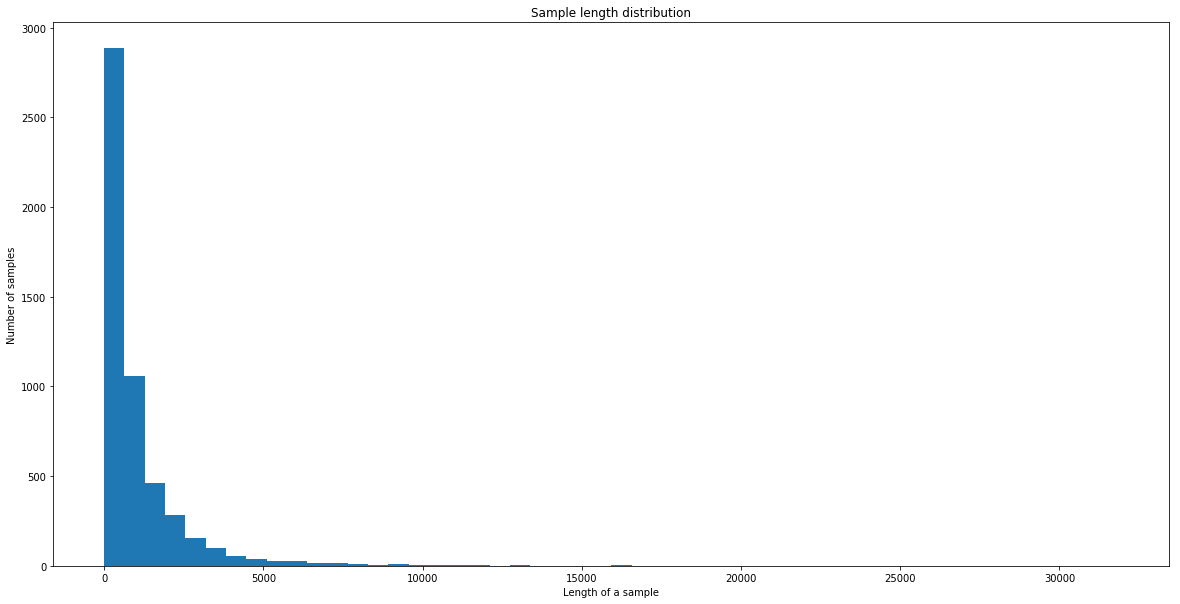

In [11]:
plot_sample_length_distribution(load_text(texts))

In [12]:
def plot_frequency_distribution_of_ngrams(sample_texts,
                                          ngram_range=(1, 2),
                                          num_ngrams=50):
    kwargs = {
            'ngram_range': (1, 1),
            'dtype': 'int32',
            'strip_accents': 'unicode',
            'decode_error': 'replace',
            'analyzer': 'word',
    }
    vectorizer = CountVectorizer(**kwargs)

    vectorized_texts = vectorizer.fit_transform(sample_texts)

    all_ngrams = list(vectorizer.get_feature_names())
    num_ngrams = min(num_ngrams, len(all_ngrams))
    
    all_counts = vectorized_texts.sum(axis=0).tolist()[0]

    all_counts, all_ngrams = zip(*[(c, n) for c, n in sorted(
        zip(all_counts, all_ngrams), reverse=True)])
    ngrams = list(all_ngrams)[:num_ngrams]
    counts = list(all_counts)[:num_ngrams]

    idx = np.arange(num_ngrams)
    plt.figure(figsize=(20,10))
    plt.bar(idx, counts, width=0.8, color='b')
    plt.xlabel('N-grams')
    plt.ylabel('Frequencies')
    plt.title('Frequency distribution of n-grams')
    plt.xticks(idx, ngrams, rotation=45)
    
    plt.show()

# 4. Frequency distribution of word

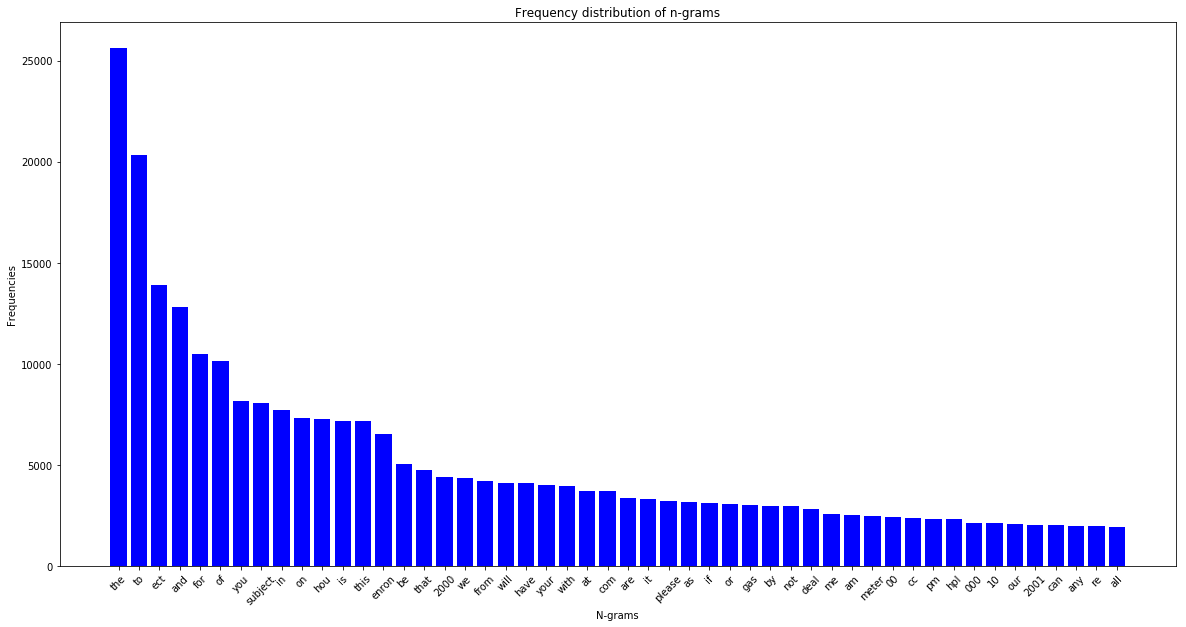

In [13]:
plot_frequency_distribution_of_ngrams(load_text(texts))

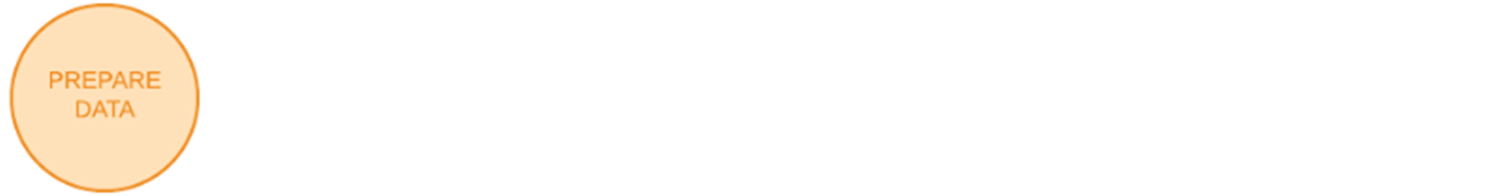

# Preprocessing and Vectorization
    1. How to present the text data to an algorithm that expects numeric input?

# 1. Using Feature engineering

    1. Transformation of raw data into features suitable for modeling. Which means: transform texts into numeric input.
    
## Process description

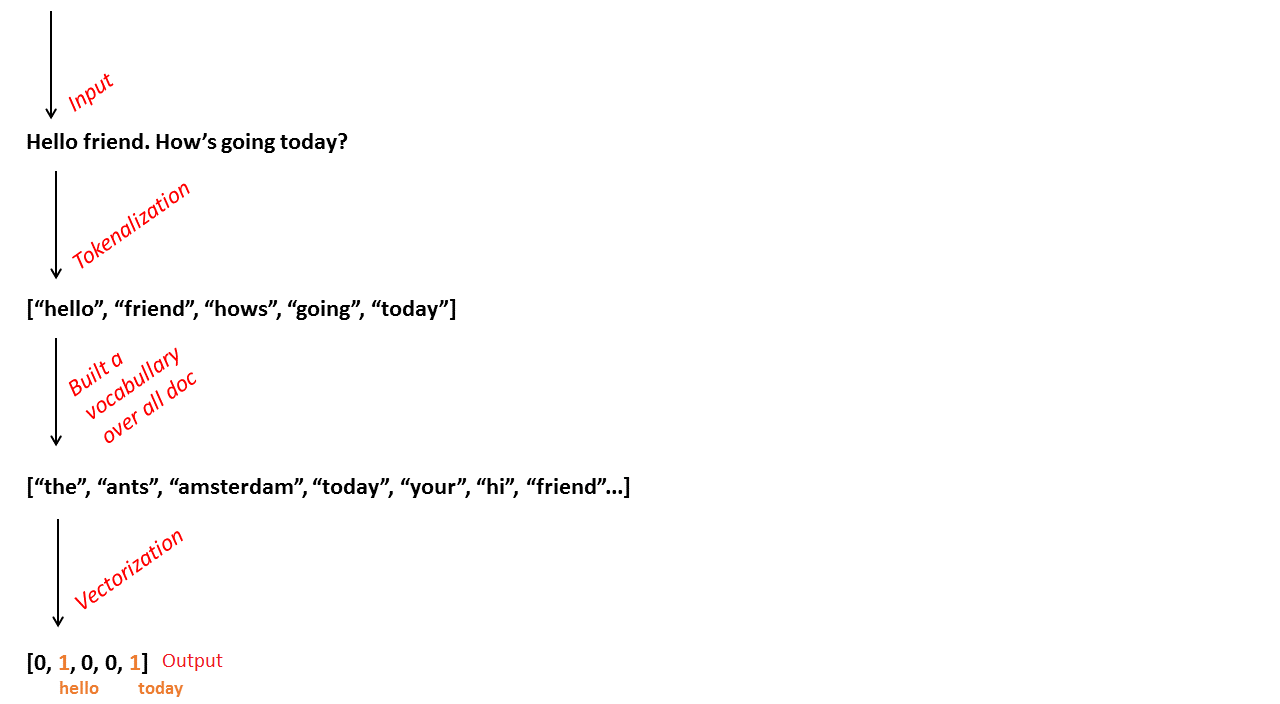

In [17]:
Image(filename='feature_engineering.png')

# Tokenalization process

    1. It will divide the texts from the dataset into a "list of words"

In [18]:
ngrams   = []

for file in texts:
    
    f = open(file)
    
    try:
        data = f.read()
    except: pass
    
    ngrams += data.split(" ")

In [19]:
'''
vector = Counter(ngrams)
vector.most_common(3000)
'''

'\nvector = Counter(ngrams)\nvector.most_common(3000)\n'

# Delete non alphabetic records

In [20]:
for word in range(len(ngrams)):
    if not ngrams[word].isalpha():
        ngrams[word] = ""
vector = Counter(ngrams)
del vector[""]

# The top 10 commom words 

In [21]:
vector.most_common(3000)[0:10]

[('the', 21967),
 ('to', 16094),
 ('ect', 11643),
 ('and', 11323),
 ('for', 9434),
 ('of', 9361),
 ('a', 8809),
 ('you', 7284),
 ('hou', 7283),
 ('in', 6870)]

In [22]:
def vectors():
    
    direc = "dataset/"
    files = os.listdir(direc)
    texts = [direc + file for file in files]

    ngrams   = []
    
    for file in texts:

        f = open(file)

        try:
            data = f.read()
        except: continue

        ngrams += data.split(" ")
    
    for word in range(len(ngrams)):
        if not ngrams[word].isalpha():
            ngrams[word] = ""
        
    vector = Counter(ngrams)
    del vector[""]

    return vector.most_common(3000)

In [23]:
def vectorize(vectors):
    
    direc = "dataset/"
    files = os.listdir(direc)
    texts = [direc + file for file in files]
    
    labels = []
    feature_set = []

    for file in texts:
        
        data = []
        
        try:
            f = open(file)
            words = f.read().split(' ')
        except: continue
   
        for row in vectors:
            data.append(words.count(row[0]))
        feature_set.append(data)

        if "ham" in file:
            labels.append(0)
        if "spam" in file:
            labels.append(1)

    return feature_set, labels

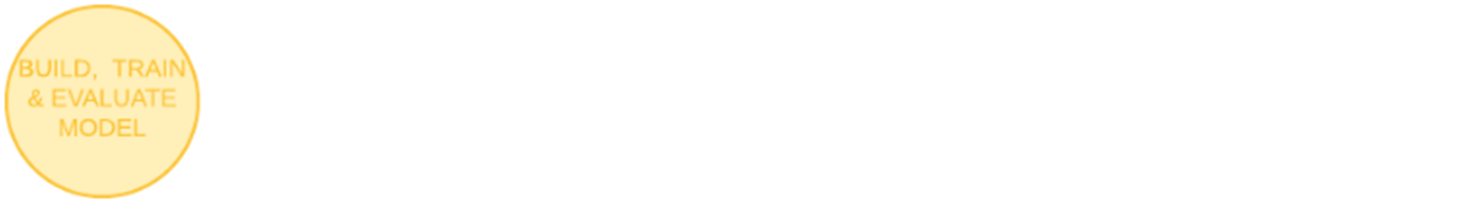

    1. What type of model should we use?



# 1. Naive Bayes: supervised classification algorithm & applications

    1. Naive Bayes is a ML algotithm for classification problems. It's primarily used for text classification, which involves hig-dimensinal training data sets. A few exaple of applications:

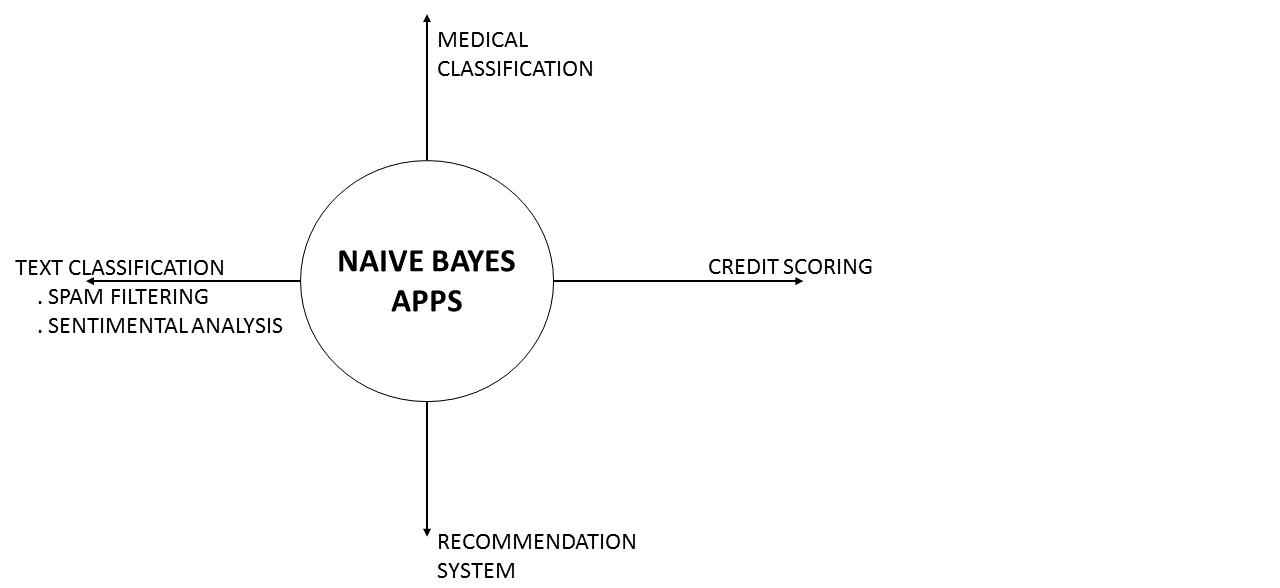

In [24]:
Image(filename='naive.png')

2. It is a probabilistic classifier that learns the probability of an object with certain features belonging to a 
    particular group in class. 
    
    
3. The bases of the Naive Bayes algorithm is the basis of the Bayse Theorm. It gives a method to calculate the probability that is: the conditional propability of an event based on the previous knowledge available on the events

# Workflow (review)

## 1. Get data

In [ ]:
data = vectors()

## 2. Prepare data (Feature extraction)

In [ ]:
features, labels = vectorize(data)

## 3. Built, Train, and Evaluate the Model 

* Splitting lebeled data into training and test sets

In [ ]:
feature_train, feature_test, labels_train, labels_test = tts(features[:-1], labels, test_size=0.2)

 * Choosing the ML algorithm - Naive Bayes

In [ ]:
classifier = MultinomialNB()

* Training the ML model

In [ ]:
classifier.fit(feature_train, labels_train)

* Evaluating the predction function on a test set

In [ ]:
preds = classifier.predict(feature_test)
print ('The ML model accuracy score is: {}'.format(accuracy_score(labels_test, preds)))

In [ ]:
def main():

    data = vectors()
    
    # Feature extraction
    features, labels = vectorize(data)

    # Splitting lebeled data into training and test sets
    feature_train, feature_test, labels_train, labels_test = tts(features[:-1], labels, test_size=0.2)
    
    # Choosing the ML algorithm - Naive Bayes
    classifier = MultinomialNB()
    
    # Training the ML model
    classifier.fit(feature_train, labels_train)
    
    # Evaluating the predction function on a test set
    preds = classifier.predict(feature_test)
    print ('The ML model accuracy score is: {}'.format(accuracy_score(labels_test, preds)))
    
    # Serialization: Storing data / putting the classifier in production 
    save(classifier, "text_classifier.mdl")

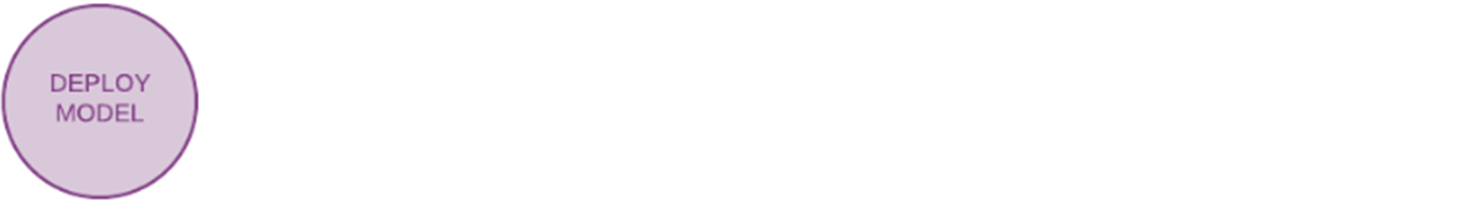

    1. Deploy your model (Serialization)
        a) It is a process of translating data structures or object into a format that can be stored 
    2. Detecte if a email (text) is a spam or a not-spam email

# 1. Deploy the ML model or Storage in memory traning data and model

## Process

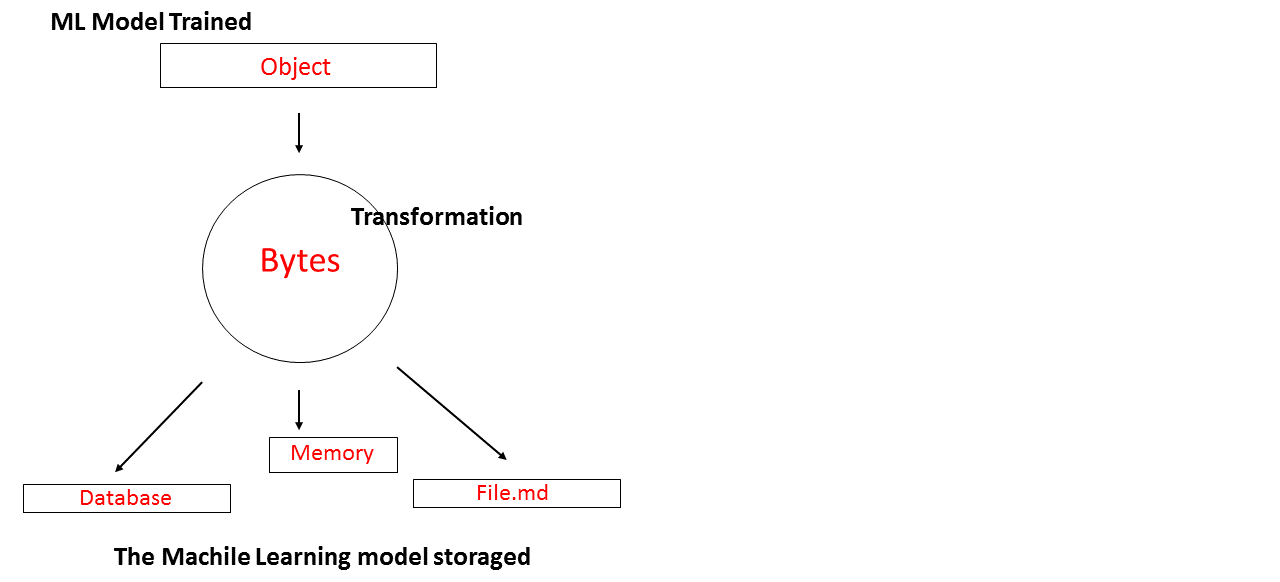

In [25]:
Image(filename='Serialization.png')

In [ ]:
def save(classifier, name):
    with open(name, 'wb') as fp:
        cPickle.dump(classifier, fp)
    print ("The classifer is saved!")
    
def load(classifier):
    
    with open(classifier, 'rb') as fp:
        classifier = cPickle.load(fp)
    return classifier

In [ ]:
if __name__ == "__main__":
    main()

# 2. Solution: Detect/Predict if a text is a spam or not-spam email

## Workflow

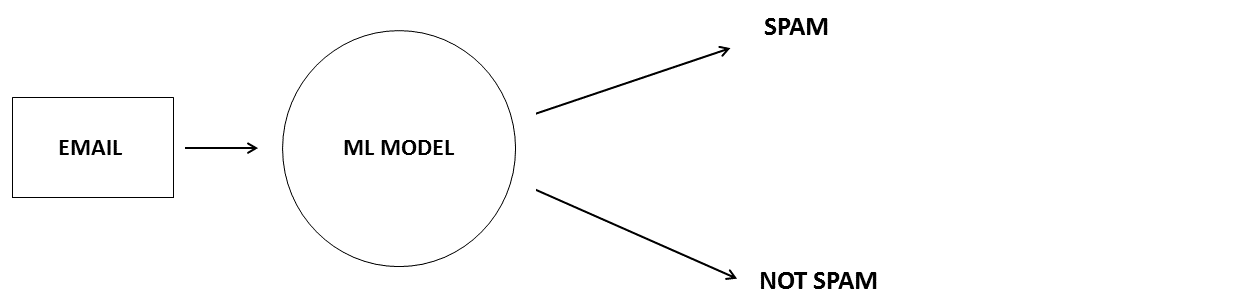

In [26]:
Image(filename='detector.png') 

In [ ]:
def detector():
    
    vector     = vectors()
    classifier = load("text_classifier.mdl")

    while True:

        features = []

        inp = input(">").split()

        if inp[0].lower().strip() == "exit": break

        for word in vector:
            features.append(inp.count(word[0]))

        preds = classifier.predict([features])
        
        print('-------------------')
        print (["NOT SPAM!", "SPAM!"][preds[0]])

In [ ]:
detector()